# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
pd.set_option('display.float_format', str)

In [ ]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross

In [4]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
print(rt_movie_info['rating'].value_counts())
print(rt_movie_info.info())
#we have only 3 null values in rating. It's a very good column to work with.
#drop nc17 and null values in this database

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


In [5]:
rt_movie_info = rt_movie_info.dropna(subset=['box_office'])

In [6]:
print(rt_movie_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(1), object(11)
memory usage: 34.5+ KB
None


In [7]:
rt_movie_info['box_office'] = rt_movie_info['box_office'].str.replace(r'\D+', '', regex=True).astype('float')

In [8]:
rt_movie_info.drop(rt_movie_info[rt_movie_info['rating'] == "NR"].index, inplace = True)
rt_movie_info.drop(rt_movie_info[rt_movie_info['rating'] == "NC17"].index, inplace = True)

In [9]:
rt_movie_info = rt_movie_info.set_index('id')

In [10]:
rt_movie_info['rating'].value_counts()

R        142
PG-13    117
PG        52
G          9
Name: rating, dtype: int64

In [11]:
rating_total = rt_movie_info.groupby(['rating']).mean().round(1)
rating_total

,box_office
rating,
G,30447955.6
PG,51033556.7
PG-13,56520154.9
R,23231760.9


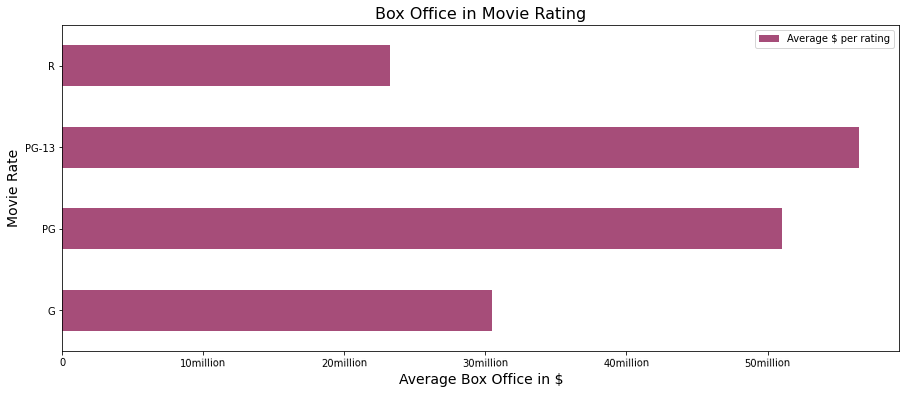

In [12]:
ax = rating_total.plot(kind='barh', figsize=(15,6), color='#a64d79')
plt.title('Box Office in Movie Rating', size=16)
ax.set_xlabel('Average Box Office in $', size=14)
ax.set_ylabel('Movie Rate', size=14)
plt.xticks([0,1e7,2e7,3e7,4e7,5e7],["0", "10million", "20million", "30million", "40million", "50million"], rotation = 1)
ax.legend(['Average $ per rating']);

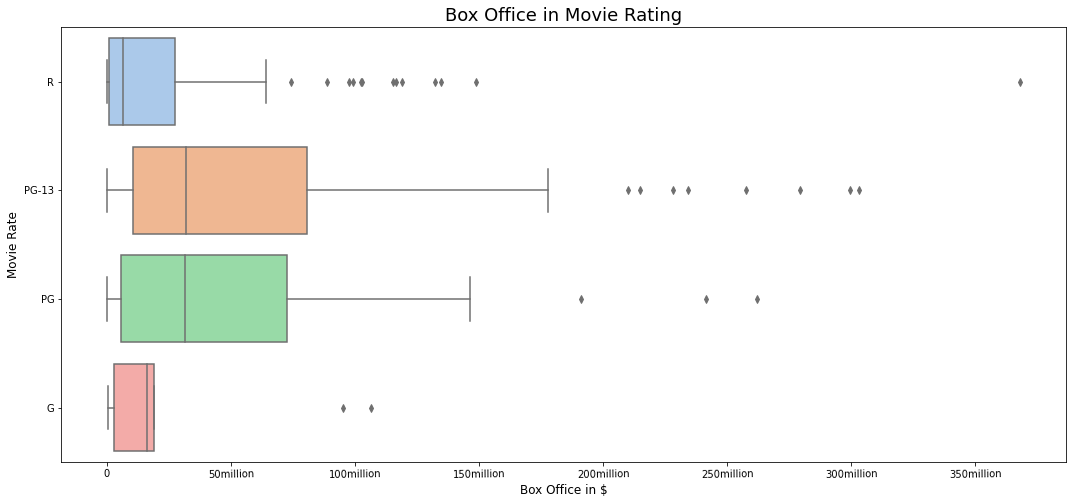

In [13]:
plot_test = plt.figure(figsize=(18,8))
plot_test_ax = sns.boxplot(data = rt_movie_info, x='box_office', y='rating', palette='pastel')
plot_test_ax.tick_params(axis='x', labelrotation = 1)
plot_test_ax.set_title('Box Office in Movie Rating', size=18)
plot_test_ax.set_xlabel('Box Office in $', size=12)
plot_test_ax.set_ylabel('Movie Rate', size=12)
ticks1 = [0,0.5e8,1e8,1.5e8,2e8, 2.5e8, 3e8, 3.5e8]
ticks2 = ["0", "50million", "100million", "150million", "200million", "250million", "300million", "350million"]
plot_test_ax.xaxis.set_label_coords(0.5, -0.05)
plt.xticks(ticks1, ticks2, rotation = 1);

This does not include all of the CSVs! Make sure you open and explore some of the other ones.

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [14]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

In [15]:
import sqlite3

In [16]:
conn = sqlite3.connect("im.db")

In [17]:
movie_basics = pd.read_sql("""
SELECT movie_id, original_title, start_year, genres, primary_name, person_id, primary_title, death_year
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
GROUP BY movie_id
;""", conn)

In [18]:
movie_basics['genre_1'] = movie_basics['genres'].str.split(',')

In [19]:
movie_basics = movie_basics.explode('genre_1')

In [20]:
movie_basics

,movie_id,original_title,start_year,genres,primary_name,person_id,primary_title,death_year,genre_1
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,nm0712540,Sunghursh,2004.0,Action
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,nm0712540,Sunghursh,2004.0,Crime
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,nm0712540,Sunghursh,2004.0,Drama
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",Mani Kaul,nm0002411,One Day Before the Rainy Season,2011.0,Biography
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",Mani Kaul,nm0002411,One Day Before the Rainy Season,2011.0,Drama
...,...,...,...,...,...,...,...,...,...
140411,tt9916538,Kuambil Lagi Hatiku,2019,Drama,Azhar Kinoi Lubis,nm8185151,Kuambil Lagi Hatiku,NaN,Drama
140412,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Ana Célia de Oliveira,nm9272491,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
140413,tt9916706,Dankyavar Danka,2013,Comedy,Kanchan Nayak,nm7764440,Dankyavar Danka,NaN,Comedy
140414,tt9916730,6 Gunn,2017,None,Kiran Gawade,nm10538612,6 Gunn,NaN,None


In [21]:
movie_basics.loc[movie_basics['original_title'] == 'Frozen']

,movie_id,original_title,start_year,genres,primary_name,person_id,primary_title,death_year,genre_1
5951,tt1323045,Frozen,2010,"Adventure,Drama,Sport",Adam Green,nm1697112,Frozen,NaN,Adventure
5951,tt1323045,Frozen,2010,"Adventure,Drama,Sport",Adam Green,nm1697112,Frozen,NaN,Drama
5951,tt1323045,Frozen,2010,"Adventure,Drama,Sport",Adam Green,nm1697112,Frozen,NaN,Sport
34009,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Adventure
34009,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Animation
34009,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Comedy


In [22]:
movie_basics = movie_basics[movie_basics['death_year'].isnull()]

## Your Data Analysis Here


In [ ]:
#rotten_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", encoding="latin1", on_bad_lines='skip', delimiter="\t")

In [23]:
budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
#HAD TO CONVERT THE STRING COLUMNS TO INTEGERS SO I COULD USE IT TO THE ANALYSIS
budgets['production_budget'] = budgets['production_budget'].str.replace(r'\D+', '', regex=True).astype('float')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(r'\D+', '', regex=True).astype('float')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(r'\D+', '', regex=True).astype('float')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747.0
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


decided to merge budgets with IMBD data base due to the IMBD data base has tons more of movies than the budgets dataframe,
its probably contains much more duplicates that may affect the studio with the data.

In [25]:
budgets['year'] = pd.DatetimeIndex(budgets['release_date']).year

In [26]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875.0,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963.0,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747.0,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,2018
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,2015


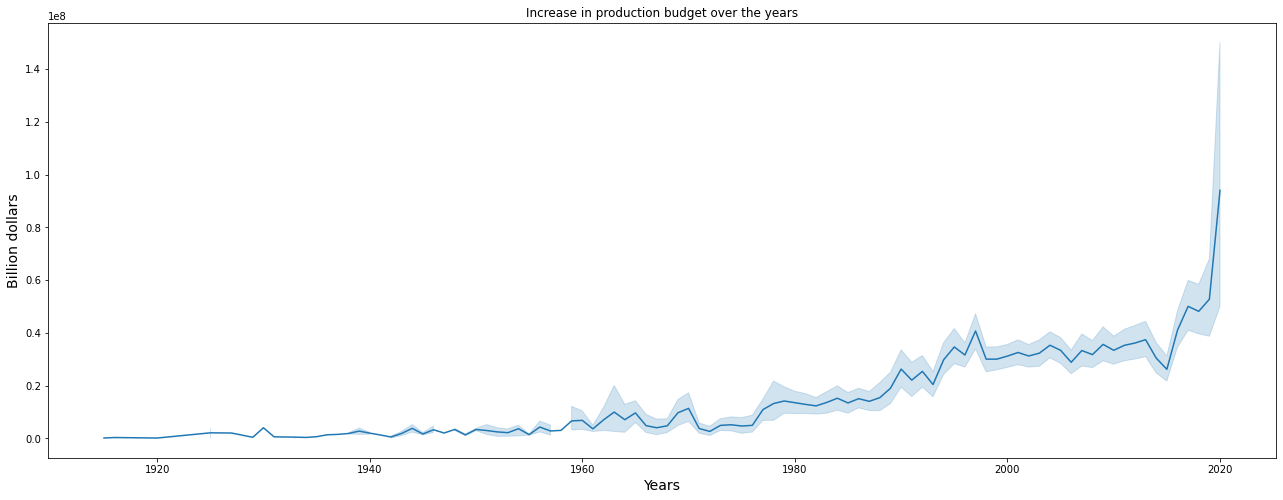

In [27]:
fig5, ax5 = plt.subplots(figsize=(22,8))
sns.lineplot(data=budgets, x="year", y="production_budget", palette='rocket')
plt.title('Increase in production budget over the years')
plt.xlabel('Years', size=14)
plt.ylabel('Billion dollars', size=14)
plt.show()

In [28]:
revenue_rate = movie_basics.merge(budgets, left_on=['primary_title', 'start_year'], right_on=['movie' , 'year'], how='inner')

In [29]:
revenue_rate.loc[revenue_rate['original_title'] == 'Frozen']

,movie_id,original_title,start_year,genres,primary_name,person_id,primary_title,death_year,genre_1,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
2400,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Adventure,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1272469910.0,2013
2401,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Animation,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1272469910.0,2013
2402,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",Chris Buck,nm0118333,Frozen,NaN,Comedy,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1272469910.0,2013


In [30]:
revenue_rate['genre_1'].value_counts() 

Drama          736
Comedy         515
Action         450
Adventure      352
Thriller       263
Crime          233
Romance        187
Horror         184
Sci-Fi         134
Biography      133
Mystery        125
Fantasy        124
Animation      102
Family          95
Documentary     51
Music           50
History         40
Sport           33
War             17
Western         11
Musical          9
Reality-TV       1
Name: genre_1, dtype: int64

In [32]:
revenue_rate.drop(revenue_rate[revenue_rate['genre_1'] == "Reality-TV"].index, inplace = True)

In [33]:
revenue_rate['WorldWide_Gross'] = revenue_rate['worldwide_gross'] - revenue_rate['domestic_gross'] 

In [34]:
revenue_rate = revenue_rate.drop(['id', 'start_year', 'production_budget', 'worldwide_gross', 'death_year', 'year'], axis=1)

In [35]:
revenue_rate

,movie_id,original_title,genres,primary_name,person_id,primary_title,genre_1,release_date,movie,domestic_gross,WorldWide_Gross
0,tt0249516,Foodfight!,"Action,Animation,Comedy",Lawrence Kasanoff,nm0440415,Foodfight!,Action,"Dec 31, 2012",Foodfight!,0.0,73706.0
1,tt0249516,Foodfight!,"Action,Animation,Comedy",Lawrence Kasanoff,nm0440415,Foodfight!,Animation,"Dec 31, 2012",Foodfight!,0.0,73706.0
2,tt0249516,Foodfight!,"Action,Animation,Comedy",Lawrence Kasanoff,nm0440415,Foodfight!,Comedy,"Dec 31, 2012",Foodfight!,0.0,73706.0
3,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",Ben Stiller,nm0001774,The Secret Life of Walter Mitty,Adventure,"Dec 25, 2013",The Secret Life of Walter Mitty,58236838.0,129624345.0
4,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",Ben Stiller,nm0001774,The Secret Life of Walter Mitty,Comedy,"Dec 25, 2013",The Secret Life of Walter Mitty,58236838.0,129624345.0
...,...,...,...,...,...,...,...,...,...,...,...
3844,tt8408152,Detention,Horror,Richy Salgado,nm9834599,Detention,Horror,"Apr 13, 2012",Detention,0.0,0.0
3845,tt8632862,Fahrenheit 11/9,Documentary,Michael Moore,nm0601619,Fahrenheit 11/9,Documentary,"Sep 21, 2018",Fahrenheit 11/9,6352306.0,301409.0
3846,tt8852552,Icarus,Thriller,Maarten Diederen,nm5921185,Icarus,Thriller,"Feb 9, 2010",Icarus,0.0,0.0
3847,tt9024106,Unplanned,"Biography,Drama",Chuck Konzelman,nm0465484,Unplanned,Biography,"Mar 29, 2019",Unplanned,18107621.0,0.0


In [36]:
box_by_genre = revenue_rate.groupby(['genre_1']).mean().round(1).sort_values(by='genre_1', ascending = False)

In [37]:
box_by_genre

,domestic_gross,WorldWide_Gross
genre_1,,
Western,48277206.8,56378099.8
War,24155036.0,33626802.0
Thriller,43346115.9,69774739.0
Sport,33668949.4,19161106.9
Sci-Fi,125058209.6,217879589.6
Romance,32397251.2,34624249.7
Mystery,38659668.5,50412046.3
Musical,121651825.0,197715139.6
Music,35056456.9,39958699.3


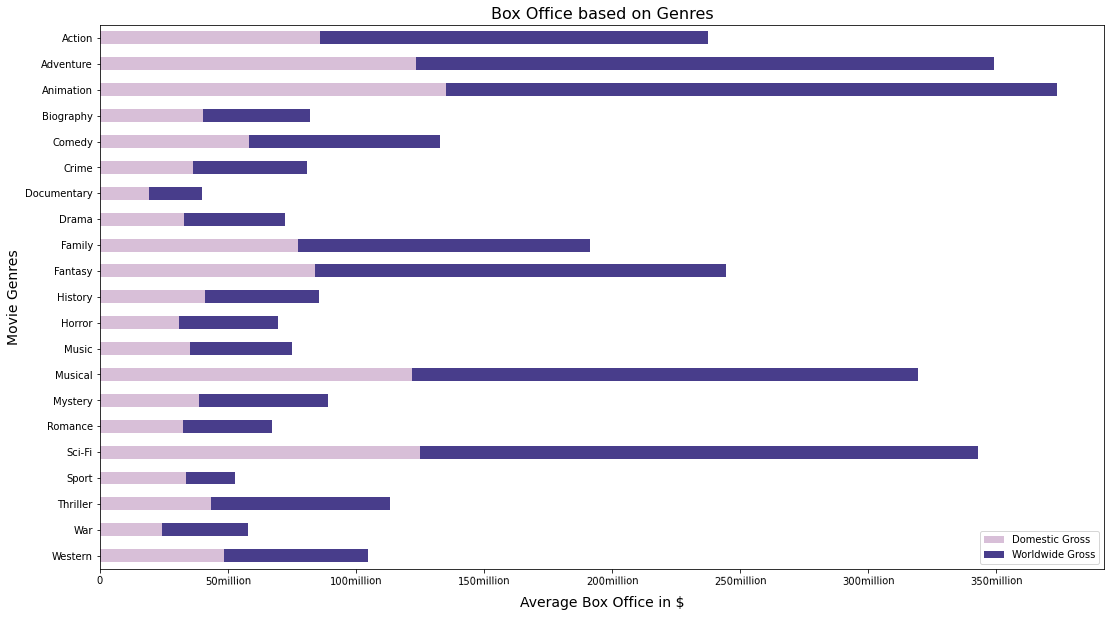

In [38]:
ax2 = box_by_genre.plot(kind='barh', figsize=(18,10),  stacked=True, color=['thistle', 'darkslateblue'])
plt.title('Box Office based on Genres', size=16)
ax2.set_xlabel('Average Box Office in $', size=14)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.set_ylabel('Movie Genres', size=14)
ax2.legend(['Domestic Gross', 'Worldwide Gross'])
ticks3 = [0,0.5e8,1e8,1.5e8,2e8, 2.5e8, 3e8, 3.5e8]
ticks4 = ["0", "50million", "100million", "150million", "200million", "250million", "300million", "350million"]
plt.xticks(ticks3, ticks4, rotation = 1)
plt.show();

In [43]:
revenue_rate2 = movie_basics.merge(budgets, left_on=['primary_title', 'start_year'], right_on=['movie' , 'year'], how='inner')
revenue_rate2.drop_duplicates(subset =['production_budget', 'primary_name'], keep = 'first', inplace = True)
revenue_rate2 = revenue_rate2[revenue_rate2['death_year'].isnull()]
revenue_rate2['revenue'] = revenue_rate2['worldwide_gross'] - revenue_rate2['production_budget'] 
top_30 = revenue_rate2.groupby(['primary_name', 'movie']).mean().round(1).sort_values(by='revenue', ascending = False)
revenue_rate2 = revenue_rate2.drop(['id', 'start_year', 'domestic_gross', 'worldwide_gross', 'death_year', 'year'], axis=1)
box_by_director = revenue_rate2.groupby(['primary_name']).mean().round(1).sort_values(by='revenue', ascending = False)

In [44]:
#box_by_director = revenue_rate.groupby(['primary_name']).mean()
#data_sorted = box_by_director.sort_values(by='worldwide_gross', ascending=False)
graph = box_by_director.head(30)               
#sort by worldwide_gross
#limit 50 directors

In [45]:
graph

,production_budget,revenue
primary_name,,
Joss Whedon,277800000.0,1182674930.0
Chris Buck,150000000.0,1122469910.0
Joe Russo,240000000.0,1060868500.7
Kyle Balda,74500000.0,1023031961.5
James Wan,123333333.3,871205858.3
Jared Bush,150000000.0,869429616.0
James Fotopoulos,200000000.0,825491110.0
Angus MacLane,200000000.0,821215193.0
Peter Jackson,250000000.0,767003568.0


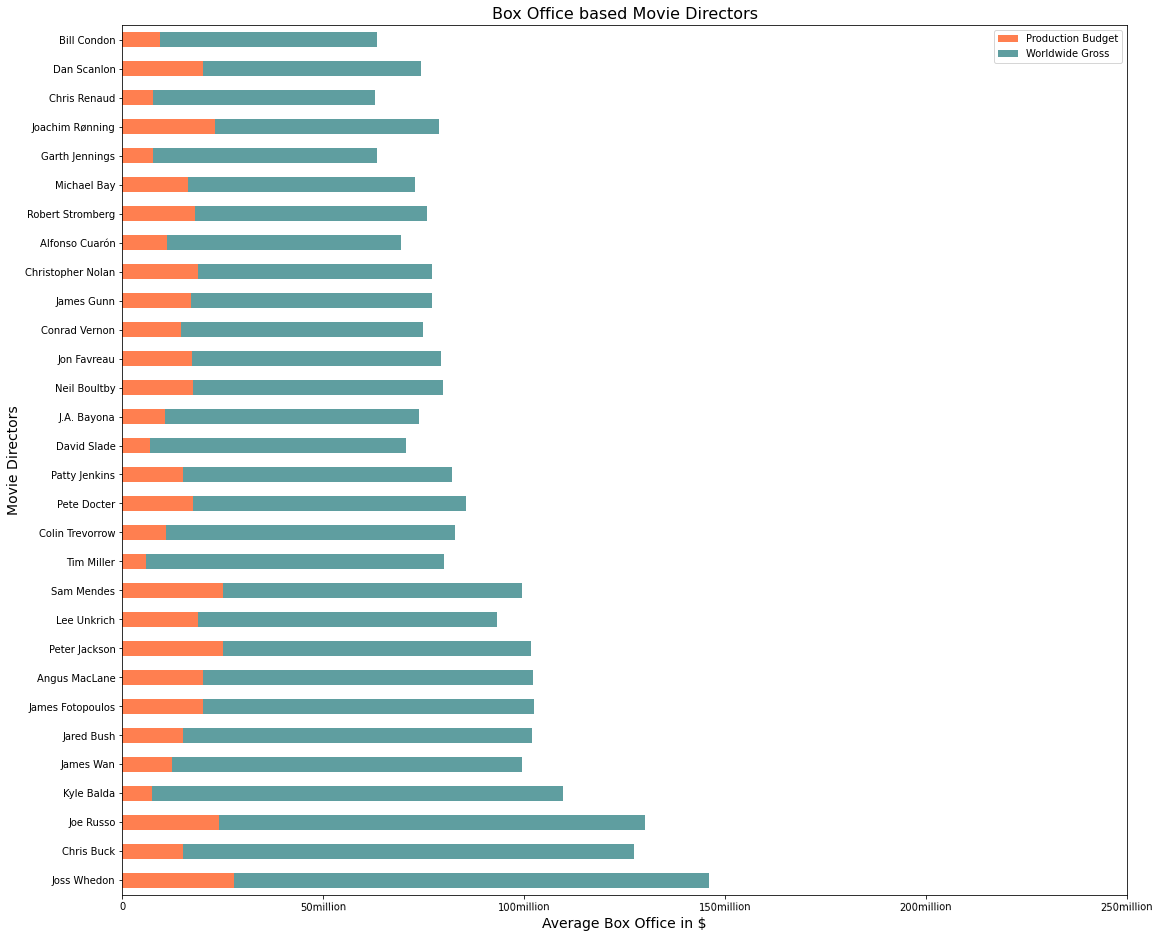

In [46]:
ax3 = graph.plot(kind='barh', figsize=(18,16), stacked = True, color=["coral", "cadetblue"])
plt.title('Box Office based Movie Directors', size=16)
ax3.set_xlabel('Average Box Office in $', size=14)
ax3.set_ylabel('Movie Directors', size=14)
ax3.legend(['Production Budget', 'Worldwide Gross'])
ticks5 = [0,0.5e9,1e9,1.5e9,2e9, 2.5e9]
ticks6 = ["0", "50million", "100million", "150million", "200million", "250million"]
plt.xticks(ticks5, ticks6, rotation = 1)
plt.show();

In [47]:
TMDB_reviews = pd.read_csv("zippedData/tmdb.movies.csv.gz")
TMDB_reviews

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1


In [48]:
TMDB_reviews['vote_count'].sum()

5150260

At the end, it is always a best practice to close the connection to the database.

In [49]:
conn.close()